In [3]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

In [7]:
pd.pandas.set_option("display.max_column",None)

In [19]:
df1 = pd.read_csv("car data.csv")
df1.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [20]:
df1.shape

(301, 9)

In [21]:
# checking the unique values
print(df1["Fuel_Type"].unique())
print(df1["Seller_Type"].unique())
print(df1["Transmission"].unique())
print(df1["Owner"].unique())

['Petrol' 'Diesel' 'CNG']
['Dealer' 'Individual']
['Manual' 'Automatic']
[0 1 3]


In [22]:
df1.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [23]:
df1.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [24]:
df1.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [28]:
df = df1[["Year", 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner']]
df.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [29]:
df["Current_year"] = 2020
df.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current_year
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2020
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2020
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2020
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2020
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2020


In [30]:
# we will derive a new feature based on year
df["no_years"] = df["Current_year"] - df["Year"]
df.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current_year,no_years
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2020,6
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2020,7
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2020,3
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2020,9
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2020,6


In [31]:
df.drop(columns=["Year","Current_year"], axis=1, inplace=True)
df.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,no_years
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,6
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,7
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,3
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,9
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,6


In [32]:
# handling cateorical features
df = pd.get_dummies(df, drop_first=True)
df.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,no_years,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,6,0,1,0,1
1,4.75,9.54,43000,0,7,1,0,0,1
2,7.25,9.85,6900,0,3,0,1,0,1
3,2.85,4.15,5200,0,9,0,1,0,1
4,4.60,6.87,42450,0,6,1,0,0,1


In [33]:
df.shape

(301, 9)

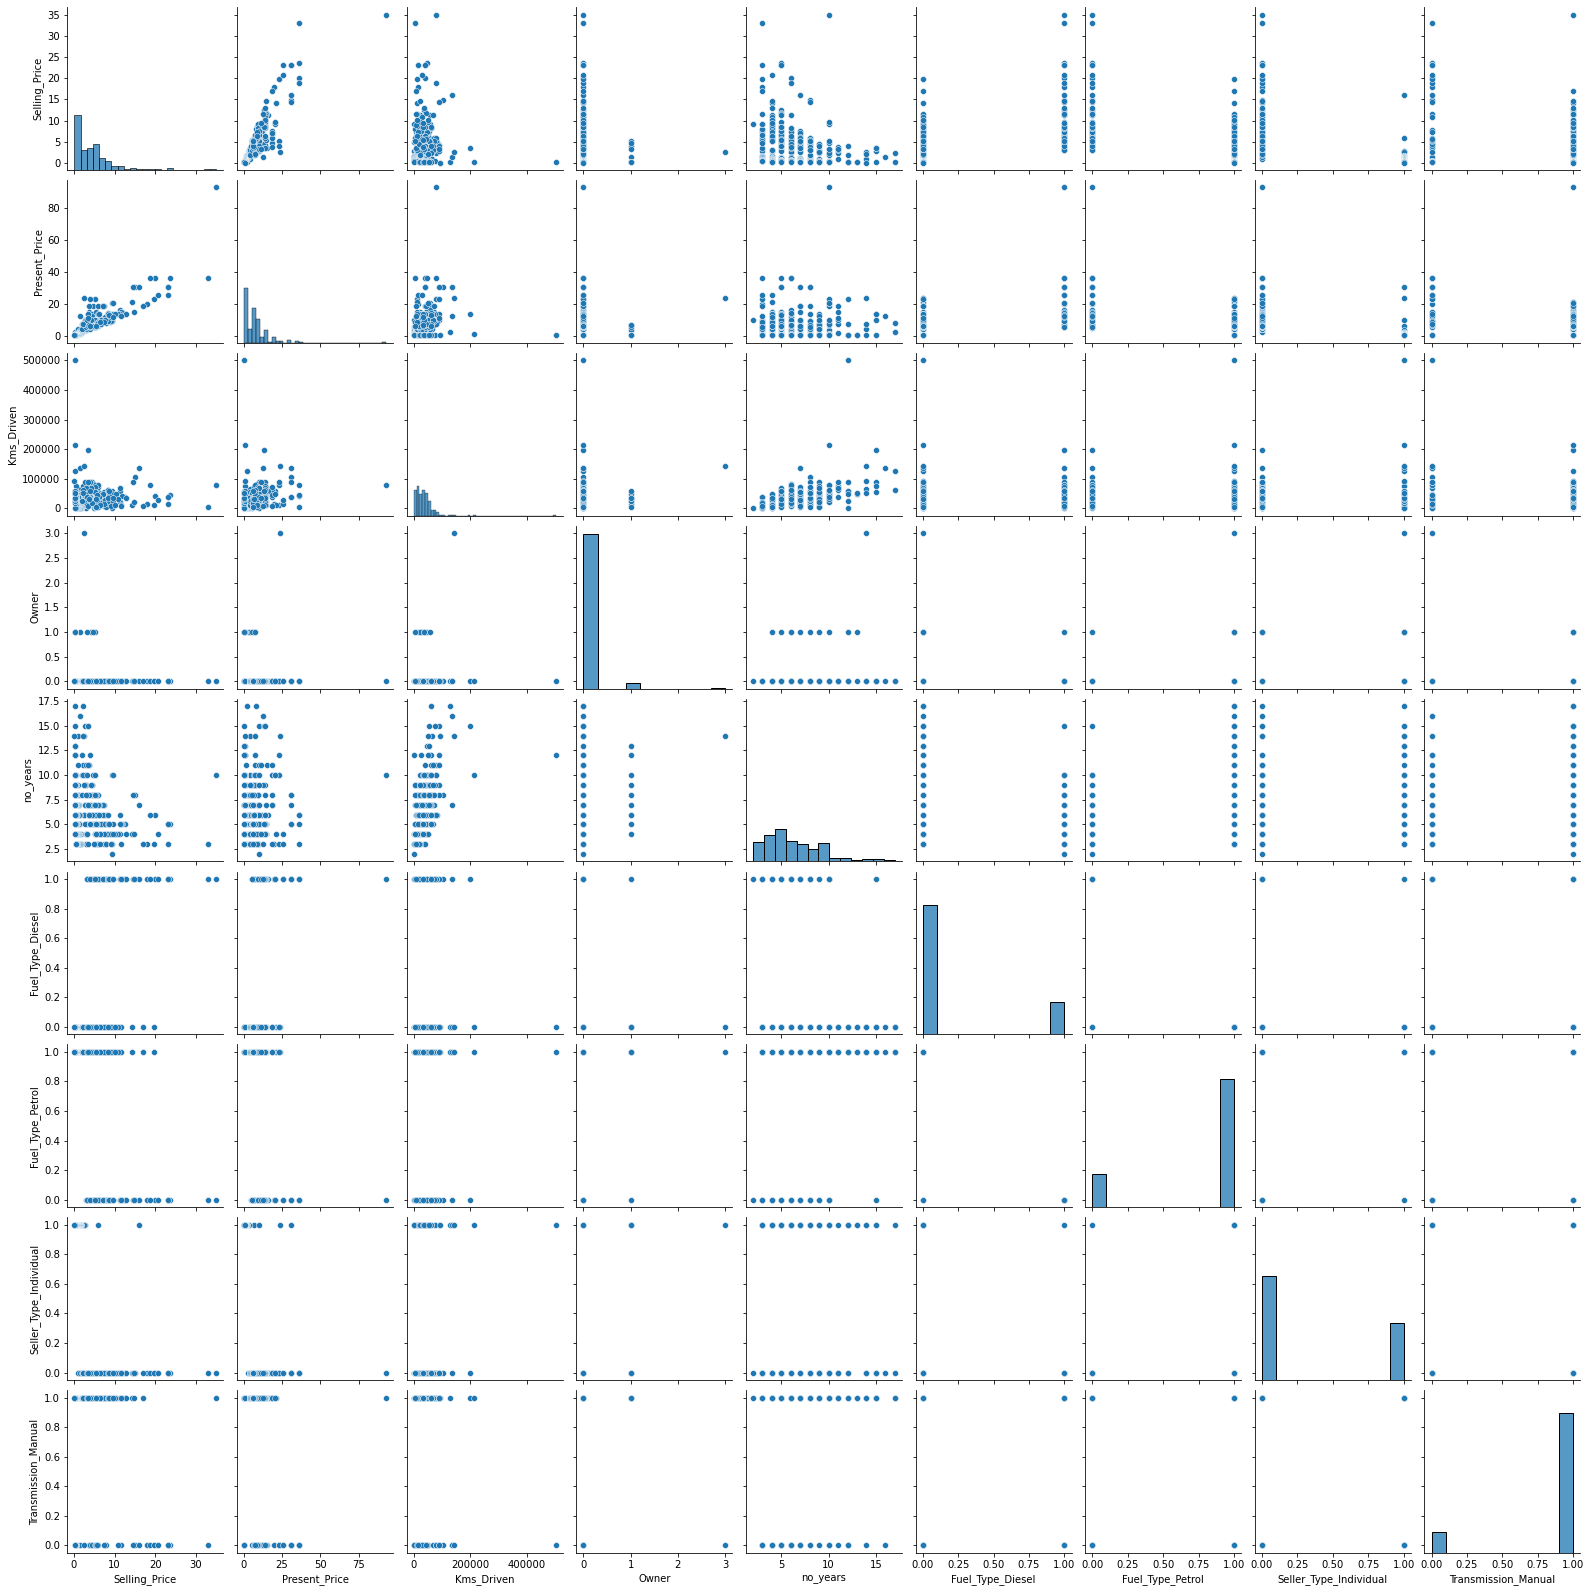

In [35]:
sns.pairplot(df)

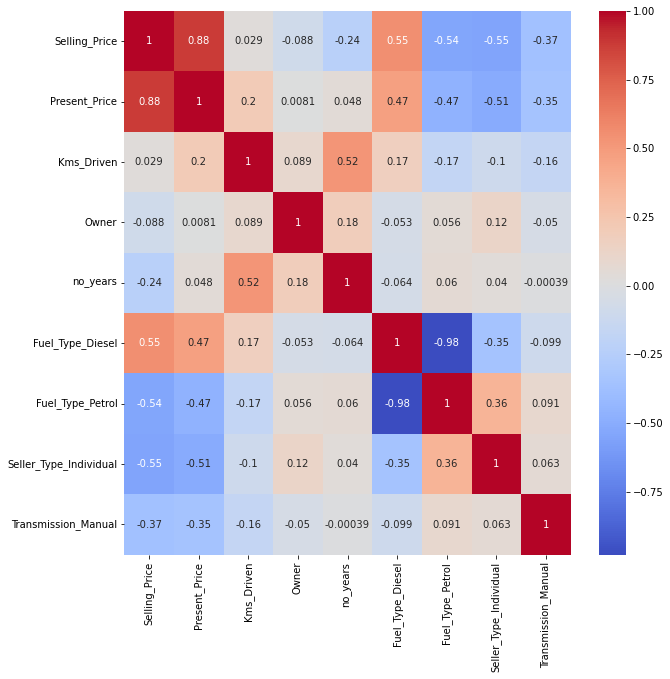

In [40]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True, cmap = "coolwarm")
plt.show()

In [41]:
df.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,no_years,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,6,0,1,0,1
1,4.75,9.54,43000,0,7,1,0,0,1
2,7.25,9.85,6900,0,3,0,1,0,1
3,2.85,4.15,5200,0,9,0,1,0,1
4,4.60,6.87,42450,0,6,1,0,0,1


In [42]:
# independant and dependant features
x = df.iloc[:,1:]
y = df.iloc[:,0]

In [43]:
x.head()

,Present_Price,Kms_Driven,Owner,no_years,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,5.59,27000,0,6,0,1,0,1
1,9.54,43000,0,7,1,0,0,1
2,9.85,6900,0,3,0,1,0,1
3,4.15,5200,0,9,0,1,0,1
4,6.87,42450,0,6,1,0,0,1


In [44]:
y.head()

0    3.35
1    4.75
2    7.25
3    2.85
4    4.60
Name: Selling_Price, dtype: float64

In [45]:
## feature importance
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
model.fit(x,y)

ExtraTreesRegressor()

<AxesSubplot:>

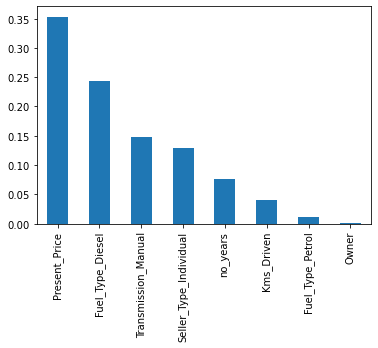

In [55]:
a = pd.Series(model.feature_importances_, index=x.columns)
a.nlargest(10).plot.bar()

In [57]:
# train test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y, random_state=0, test_size=0.2)

In [60]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

In [62]:
# hyper parameter tuning
par = {"n_estimators":np.arange(100,1200,100), "max_features": ["auto","sqrt"], "max_depth": np.arange(5,12)}
rf_cv  = RandomizedSearchCV(estimator=RandomForestRegressor(random_state=15), param_distributions=par, cv=8,
                            scoring="neg_mean_squared_error",refit=True)
rf_cv.fit(x_train,y_train)

RandomizedSearchCV(cv=8, estimator=RandomForestRegressor(random_state=15),
                   param_distributions={'max_depth': array([ 5,  6,  7,  8,  9, 10, 11]),
                                        'max_features': ['auto', 'sqrt'],
                                        'n_estimators': array([ 100,  200,  300,  400,  500,  600,  700,  800,  900, 1000, 1100])},
                   scoring='neg_mean_squared_error')

In [63]:
rf_cv.best_params_

{'n_estimators': 200, 'max_features': 'auto', 'max_depth': 11}

In [64]:
y_pred = rf_cv.predict(x_test)
y_pred

array([ 6.85949899,  0.46501488,  4.60139897,  8.741675  , 15.1456    ,
        5.30486667,  3.18481071,  0.44307125,  3.9014    ,  4.72704881,
        2.78704167,  0.7842025 ,  4.82597083,  7.21236961,  7.73025   ,
       15.09885   ,  6.67725568,  4.00000776,  0.45842647,  1.6       ,
        3.03594167,  5.02293333,  5.23006599,  9.697605  ,  0.19947798,
        0.72935   ,  0.31119583,  0.68823614,  0.47905159,  4.1333    ,
        2.518     ,  5.80785896,  0.48744563,  7.56702652,  3.3337    ,
        1.16675775,  5.68706029,  5.28990462,  0.23896667,  7.57680794,
        7.92741667, 22.92125   ,  4.89952992,  4.49978968,  5.72193895,
       11.14609167,  0.23802528,  0.78066679,  5.33057222,  6.6819517 ,
        6.2902175 ,  3.090325  ,  5.28379205, 24.23      ,  1.16831802,
        1.13990689,  0.48342321,  2.45083333,  3.58386304,  2.51371   ,
        3.81585   ])

In [67]:
import pickle
# open a file where u want to store the data
file = open("random_forest_regression_model.pkl", "wb")
# dump information to that file
pickle.dump(rf_cv,file)

In [68]:
x_train.head()

,Present_Price,Kms_Driven,Owner,no_years,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
74,8.93,83000,0,6,1,0,0,1
239,4.43,23709,0,8,0,1,0,1
64,36.23,6000,0,3,1,0,0,0
294,6.80,33019,0,6,0,1,0,1
286,7.90,28569,0,4,0,1,0,1


In [70]:
df1.drop(columns=["Car_Name","Selling_Price"]).head()

,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,5.59,27000,Petrol,Dealer,Manual,0
1,2013,9.54,43000,Diesel,Dealer,Manual,0
2,2017,9.85,6900,Petrol,Dealer,Manual,0
3,2011,4.15,5200,Petrol,Dealer,Manual,0
4,2014,6.87,42450,Diesel,Dealer,Manual,0


In [73]:
df1["Transmission"].unique()

array(['Manual', 'Automatic'], dtype=object)